In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffmpeg
from mpl_toolkits.mplot3d import Axes3D 

CLUSTERNUM = 3

ModuleNotFoundError: No module named 'ffmpeg'

In [16]:
data = pd.read_csv("./kmeansdata", header=None).values

In [3]:
result = np.insert(data, 3, -1, axis=1)
result

array([[ 0.28, -0.27, -0.86, -1.  ],
       [ 0.17,  1.68,  0.11, -1.  ],
       [ 0.27, -1.04, -0.44, -1.  ],
       [ 0.84, -0.05,  0.46, -1.  ],
       [ 0.16, -0.19,  0.82, -1.  ],
       [ 0.21,  0.82, -0.8 , -1.  ],
       [-0.88, -0.44, -1.15, -1.  ],
       [ 0.85, -1.04,  1.47, -1.  ],
       [ 0.41, -0.62,  0.88, -1.  ],
       [-0.14,  0.51, -1.25, -1.  ],
       [ 2.14,  0.31,  0.43, -1.  ],
       [ 0.27,  2.06,  0.3 , -1.  ],
       [ 1.5 , -0.95,  0.72, -1.  ],
       [-0.85, -0.17, -0.25, -1.  ],
       [ 1.17,  0.36, -0.41, -1.  ],
       [-0.57, -0.42, -1.25, -1.  ],
       [ 0.6 , -0.9 , -0.28, -1.  ],
       [-1.53, -0.36,  1.89, -1.  ],
       [ 0.38,  0.94,  0.04, -1.  ],
       [ 1.24, -0.83,  1.4 , -1.  ],
       [ 1.51,  1.72, -0.86, -1.  ],
       [ 0.26, -0.94,  0.33, -1.  ],
       [-0.04, -1.05,  0.4 , -1.  ],
       [-0.6 , -0.95,  1.21, -1.  ],
       [-1.27, -0.64,  2.14, -1.  ],
       [-1.34,  0.  , -1.12, -1.  ],
       [-1.37, -0.18, -1.02, -1.  ],
 

In [4]:
cent_init = np.random.choice(np.arange(0,30), CLUSTERNUM)
cent_init

centroid = [result[cent_init[0]], result[cent_init[1]], result[cent_init[2]]]
#centroid = np.array([
#    [0.1, 0, 0, 0],
#    [0, 0.1, 0, 0],
#    [0, 0, 0.1, 0]])

centroid = np.array(centroid)
centroid

array([[ 0.27, -1.04, -0.44, -1.  ],
       [-1.42, -0.05, -1.22, -1.  ],
       [ 0.28, -0.27, -0.86, -1.  ]])

In [5]:
def abs(v1, v2):
    return np.sqrt((v1[0]-v2[0])**2 + (v1[1]-v2[1])**2 + (v1[1]-v2[1])**2)

In [6]:
def mean(result, cluster):
    x_sum, y_sum, z_sum = 0, 0, 0
    x_num, y_num, z_num = 0, 0, 0
    
    for n in np.arange(0,30):
        if(result[n, 3] == cluster):
            x_sum += result[n, 0]
            y_sum += result[n, 1]
            z_sum += result[n, 2]
            x_num += 1            
            y_num += 1
            z_num += 1
    
    
    x_mean = (x_sum/x_num)
    y_mean = (y_sum/y_num)
    z_mean = (z_sum/z_num)
    
    #rint("mean")
    #rint(x_mean)
    #rint(y_mean)
    #int(z_mean)
    
    return np.array([x_mean, y_mean, z_mean, 0])

In [7]:
def select_row(result, cluster):
    
    resultArray = []
    
    for n in np.arange(0, 30):
        if(result[n, 3] == cluster):
            resultArray.append(result[n])
    
    resultArray = np.array(resultArray)
    
    return resultArray

In [8]:
while True:
    
    endflag = True
    for n in np.arange(0,30):
        
        centroid_prev = result[n][3]
        
        dest0=abs(result[n], centroid[0])
        dest1=abs(result[n], centroid[1])
        dest2=abs(result[n], centroid[2])

        if(dest0 < dest1 and dest0 < dest2):
            result[n][3] = 0
        elif(dest1 < dest0 and dest1 < dest2):
            result[n][3] = 1
        else:
            result[n][3] = 2

        if(centroid_prev != result[n][3]):
            endflag = False
            
    if(endflag):
        break
        
    centroid[0] = mean(result, 0)
    centroid[1] = mean(result, 1)
    centroid[2] = mean(result, 2)
    
    print(centroid)
        


[[ 0.51       -0.9625      0.60125     0.        ]
 [-1.21222222  0.09222222 -0.27        0.        ]
 [ 0.52538462  0.52692308 -0.18384615  0.        ]]
[[ 0.477      -0.859       0.483       0.        ]
 [-1.17444444 -0.26888889 -0.35222222  0.        ]
 [ 0.52727273  0.99909091 -0.15181818  0.        ]]
[[ 0.48083333 -0.73583333  0.50916667  0.        ]
 [-1.17444444 -0.26888889 -0.35222222  0.        ]
 [ 0.53333333  1.24777778 -0.32777778  0.        ]]
[[ 0.57909091 -0.71636364  0.44545455  0.        ]
 [-1.117      -0.337      -0.196       0.        ]
 [ 0.53333333  1.24777778 -0.32777778  0.        ]]


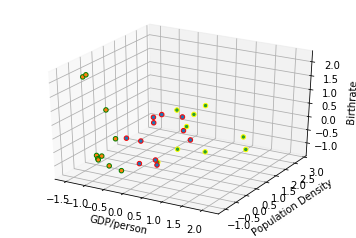

In [11]:
fig = plt.figure()
scatGraph = fig.add_subplot(1,1,1,projection='3d')

result_0 = select_row(result, 0)
result_1 = select_row(result, 1)
result_2 = select_row(result, 2)

x=result_0[:,0]
y=result_0[:,1]
z=result_0[:,2]
scatGraph.scatter(x, y, z, edgecolors='red', alpha=1)

x=result_1[:,0]
y=result_1[:,1]
z=result_1[:,2]
scatGraph.scatter(x, y, z, edgecolors='green', alpha=1)

x=result_2[:,0]
y=result_2[:,1]
z=result_2[:,2]
scatGraph.scatter(x, y, z, edgecolors='yellow', alpha=1)

scatGraph.set_xlabel('GDP/person')
scatGraph.set_ylabel('Population Density')
scatGraph.set_zlabel('Birthrate')

plt.show()

In [12]:
def matplotlib_rotate(dataname):
    for angle in range(0, 360):
        scatGraph.view_init(30, angle)
        plt.savefig("figs/{0}_{1:03d}.jpg".format(dataname, angle))

In [13]:
matplotlib_rotate("clustering")

<Figure size 432x288 with 0 Axes>

In [14]:
ffmpeg -r 10 -i figs/clustering_%03d.jpg -pix_fmt rgb24 -f gif out.gif

SyntaxError: invalid syntax (<ipython-input-14-5ae135058832>, line 1)